In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Loading

Використовуючи оператор `data`, завантажити дані з файлу якій містить транзакції (`transactions1.txt`). У кожному спостереженні, дані розділені комами. В процесі обробки можна створити змінну яка вказує на те, чи була транзакція скасуванням.

In [2]:
df=pd.read_csv("lab-2/transactions1.txt", 
    names=["_date", "_time", "Item", "Price", "Quantity", "Total", "Saller"],
    parse_dates=dict({ "Date" : ["_date","_time"]}),
    dayfirst=True
)

# is Canceled?
df['Canceled'] = df['Quantity'] < 0

df.head(20)

,Date,Item,Price,Quantity,Total,Saller,Canceled
0,2010-07-01 09:40:15,ITEM1,50,3,150,SALES_PERSON1,False
1,2010-07-01 09:44:56,ITEM1,50,2,100,SALES_PERSON1,False
2,2010-07-01 10:14:28,ITEM1,50,1,50,SALES_PERSON1,False
3,2010-07-01 11:09:13,ITEM0,30,3,90,SALES_PERSON1,False
4,2010-07-01 11:55:47,ITEM1,50,1,50,SALES_PERSON1,False
5,2010-07-01 12:54:25,ITEM0,30,3,90,SALES_PERSON1,False
6,2010-07-01 13:26:39,ITEM1,50,2,100,SALES_PERSON1,False
7,2010-07-01 13:51:41,ITEM1,50,1,50,SALES_PERSON1,False
8,2010-07-01 14:44:29,ITEM1,50,4,200,SALES_PERSON1,False
9,2010-07-01 15:02:59,ITEM0,30,3,90,SALES_PERSON1,False


## 2. Frequency
Використовуючи процедуру `freq`, обчислити кількість транзакцій проведених за кожен день. Також, використовуючи цю процедуру, обчислити кількість транзакцій що містять скасування операції (негативна кількість товару). При цьому, зберегти результати в один або два `datasets`

## 3. Frequency
Об'єднати дані, використовуючи оператор `data` з командами `merge` і `by` (за відповідними датами) та обчислити відсоток транзакцій-скасувань від загальної кількості транзакцій. 

In [3]:
def TotalTransactions(vector):
    return vector.size

def GoodTransactions(vector):
    return vector.size - np.sum(vector)

def BadTransactions(vector):
    return np.sum(vector)

def BadTransactionPercent(vector):
    return '{0:02.2f} %'.format( (np.sum(vector) / vector.size) * 100 )

dates=df.groupby(by=df['Date'].dt.strftime('%Y-%m-%d'))['Canceled']

transtions = [
    dates.apply(TotalTransactions).to_frame(name = 'Transactions Total'),
    dates.apply(GoodTransactions).to_frame(name = 'Transactions (Good)'),
    dates.apply(BadTransactions).to_frame(name = 'Transactions (Bad)' ),
    dates.apply(BadTransactionPercent).to_frame(name = 'Transactions (Bad %)')
]

pd.concat(transtions, axis=1).reset_index().head(7)

,Date,Transactions Total,Transactions (Good),Transactions (Bad),Transactions (Bad %)
0,2010-07-01,22,21,1,4.55 %
1,2010-07-02,26,23,3,11.54 %
2,2010-07-03,26,26,0,0.00 %
3,2010-07-04,27,26,1,3.70 %
4,2010-07-05,20,19,1,5.00 %
5,2010-07-06,25,24,1,4.00 %
6,2010-07-07,23,23,0,0.00 %


## 4. Перші транзакції кожного дня для подальшого аналізу

In [4]:
first_day_sell = df.groupby(by=df['Date'].dt.strftime('%Y-%m-%d'))[['Item', 'Price', 'Quantity', 'Total', 'Saller']].first()
first_day_sell.head(7)

,Item,Price,Quantity,Total,Saller
Date,,,,,
2010-07-01,ITEM1,50,3,150,SALES_PERSON1
2010-07-02,ITEM0,30,1,30,SALES_PERSON0
2010-07-03,ITEM1,50,2,100,SALES_PERSON1
2010-07-04,ITEM0,30,2,60,SALES_PERSON0
2010-07-05,ITEM1,50,3,150,SALES_PERSON1
2010-07-06,ITEM0,30,1,30,SALES_PERSON0
2010-07-07,ITEM1,50,3,150,SALES_PERSON1


In [5]:
def BadTransactionPercent(vector):
    return (np.sum(vector) / vector.size) * 100

# Grouping by Sallers
cordf = df.groupby(by=[df['Date'].dt.strftime('%Y-%m-%d'), df['Saller']])['Date'] \
            .first().dt.strftime("%H:%M:%S") \
            .to_frame(name = 'Time') \
            .reset_index()

sells = df.groupby(by=[df['Date'].dt.strftime('%Y-%m-%d'), df['Saller']])['Canceled'] \
            .apply(BadTransactionPercent) \
            .to_frame(name = 'Bad_Transations') \
            .reset_index()

cordf['Bad_Transations'] = sells['Bad_Transations']

del sells

store_open_time = 9 * 3600
def normalize_time( t ):
    return (int(t[0])*60*60 + int(t[1])*60 + int(t[2])) - store_open_time

cordf['SecondsAfterNine'] = cordf['Time'].str.split(":").apply(normalize_time)
cordf.head()

,Date,Saller,Time,Bad_Transations,SecondsAfterNine
0,2010-07-01,SALES_PERSON1,09:40:15,4.545455,2415
1,2010-07-02,SALES_PERSON0,09:21:07,11.538462,1267
2,2010-07-03,SALES_PERSON1,09:52:40,0.000000,3160
3,2010-07-04,SALES_PERSON0,09:29:57,3.703704,1797
4,2010-07-05,SALES_PERSON1,10:22:10,5.000000,4930


In [6]:
s0 = cordf[cordf['Saller'] == 'SALES_PERSON0'].reset_index()
s1 = cordf[cordf['Saller'] == 'SALES_PERSON1'].reset_index()

s1.head(30)

,index,Date,Saller,Time,Bad_Transations,SecondsAfterNine
0,0,2010-07-01,SALES_PERSON1,09:40:15,4.545455,2415
1,2,2010-07-03,SALES_PERSON1,09:52:40,0.000000,3160
2,4,2010-07-05,SALES_PERSON1,10:22:10,5.000000,4930
3,6,2010-07-07,SALES_PERSON1,09:37:39,0.000000,2259
4,8,2010-07-09,SALES_PERSON1,10:13:28,0.000000,4408
5,10,2010-07-11,SALES_PERSON1,09:56:21,0.000000,3381
6,12,2010-07-13,SALES_PERSON1,10:13:02,0.000000,4382
7,14,2010-07-15,SALES_PERSON1,10:03:49,0.000000,3829
8,16,2010-07-17,SALES_PERSON1,09:30:29,0.000000,1829
9,18,2010-07-19,SALES_PERSON1,10:08:02,0.000000,4082


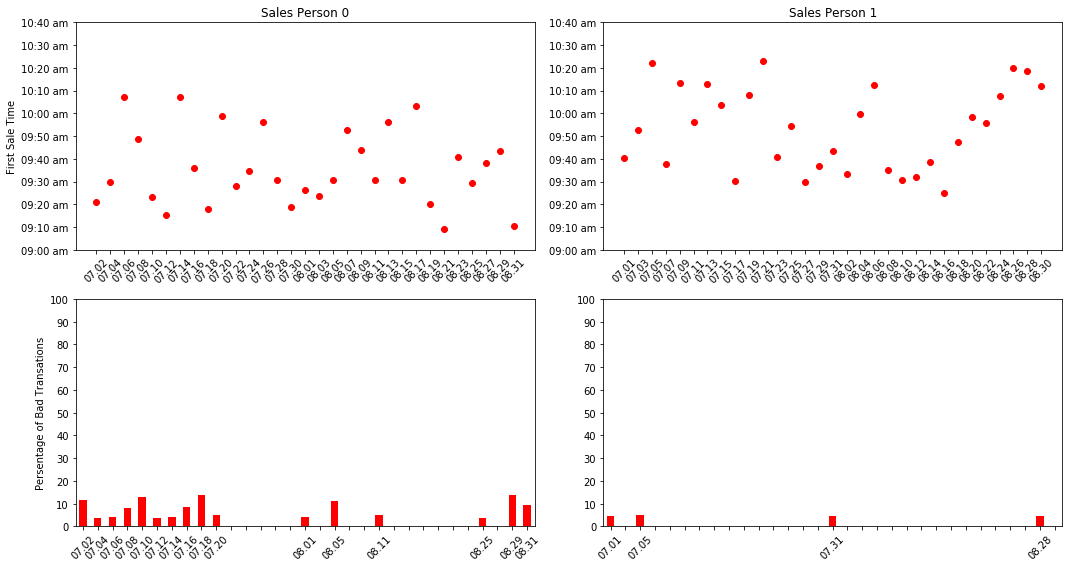

In [90]:


fig, ax = plt.subplots(2, 2,   figsize=(15,8) )

def tf( date ):
    tf_list = date.split("-")
    return tf_list[1]+"."+tf_list[2]

# -----
times_n = [i for i in range(0, int(60*60*1.7), 60*10)]

s0.plot( x='Date', y='SecondsAfterNine', style='ro', ax=ax[0][0], legend=False, yticks=times_n, xticks=s0.index );
s1.plot( x='Date', y='SecondsAfterNine', style='ro', ax=ax[0][1], legend=False, yticks=times_n, xticks=s1.index );

times = []
for t in times_n:
    hour   = ((9*60*60) + t ) // (60*60)
    minute = (((9*60*60) + t ) - (hour*60*60)) // 60
    times.append( "{:02d}:{:02d} am".format(hour, minute) )

ax[0][0].set_yticklabels(times)
ax[0][1].set_yticklabels(times)

ax[0][1].xaxis.grid(True, 'minor')

ax[0][0].set_xticklabels([tf(x) for x in s0['Date']], rotation=45, ha='center')
ax[0][1].set_xticklabels([tf(x) for x in s1['Date']], rotation=45, ha='center')


ax[0][0].set_xlabel("")
ax[0][1].set_xlabel("")

# -----
s0.plot.bar(  x='Date', y='Bad_Transations', ax=ax[1][0], legend=False, yticks=range(0, 105, 10), color="r" )
s1.plot.bar(  x='Date', y='Bad_Transations', ax=ax[1][1], legend=False, yticks=range(0, 105, 10), color="r")



ax[1][0].set_xticklabels([tf(x) if s0['Bad_Transations'][i] != 0.0 else "" for i, x in enumerate(s0['Date'])], rotation=45, ha='center')
ax[1][1].set_xticklabels([tf(x) if s1['Bad_Transations'][i] != 0.0 else "" for i, x in enumerate(s1['Date'])], rotation=45, ha='center')

ax[1][0].set_xlabel("")
ax[1][1].set_xlabel("")

# ------
ax[0][0].set_ylabel("First Sale Time")
ax[1][0].set_ylabel("Persentage of Bad Transations")

ax[0][0].set_title("Sales Person 0")
ax[0][1].set_title("Sales Person 1")

fig.tight_layout()


Візуально не спостерігається жодної залежності між часом першої покупку та кількістю відмінених транзакцій, але виходячи з частоти відмінених транзакцій `Sales Person 0` можна сказати що у неї існують певні проблеми як продавця.